In [20]:
!pip3 install torch torchvision numpy Pillow matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 847.1 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.1 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [82]:
import numpy as np
import os
import torch
import torchvision.transforms as transforms
import torchvision.transforms.functional as functional
from torch.utils.data import Dataset
import matplotlib.pylab as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import random
%matplotlib inline


In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [7]:
print(device)

cpu


In [8]:
Dataset?

Init signature: Dataset()
Docstring:     
An abstract class representing a :class:`Dataset`.

All datasets that represent a map from keys to data samples should subclass
it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a
data sample for a given key. Subclasses could also optionally overwrite
:meth:`__len__`, which is expected to return the size of the dataset by many
:class:`~torch.utils.data.Sampler` implementations and the default options
of :class:`~torch.utils.data.DataLoader`. Subclasses could also
optionally implement :meth:`__getitems__`, for speedup batched samples
loading. This method accepts list of indices of samples of batch and returns
list of samples.

.. note::
  :class:`~torch.utils.data.DataLoader` by default constructs an index
  sampler that yields integral indices.  To make it work with a map-style
  dataset with non-integral indices/keys, a custom sampler must be provided.
File:           ~/Library/Python/3.9/lib/python/site-packages/tor

In [9]:
class CocoDataset(Dataset):
    def __init__(self, path_to_list_file, transform=None, trans_params=None):
        with open(path_to_list_file, "r") as file:
            self.path_to_imgs = file.readlines()
            self.path_to_labels = [path.replace("images", "labels").replace(".png", ".txt").replace(".jpg", ".txt") for path in self.path_to_imgs]
            self.trans_params = trans_params
            self.transform = transform

    def __len__(self): 
        return len(self.path_to_imgs)

    def __getitem__(self, index):
        path_to_img = self.path_to_imgs[index % len(self.path_to_imgs)].rstrip()
        img = Image.open(path_to_img).convert("RGB")
        path_to_label = self.path_to_labels[index % len(self.path_to_imgs)].rstrip()

        labels = None
        
        if os.path.exists(path_to_label): 
            labels = np.loadtxt(path_to_label).reshape(-1, 5)

        if self.transform: 
            img, labels = self.transform(img, labels, self.trans_param)

        return img, labels, path_to_img
        
        

In [10]:
root_data = "../project/data/coco"
path_to_train_list = os.path.join(root_data, "train2014.txt")
coco_train = CocoDataset(path_to_train_list)
print(len(coco_train))

82783


In [11]:
root_data = "../project/data/coco"
path_to_val_list = os.path.join(root_data, "val2014.txt")
coco_val = CocoDataset(path_to_val_list)
print(len(coco_val))

40504


In [32]:
image, labels, path_to_img = coco_train[1]
print("Image size:", image.size, type(image))
print("labels shape:", labels.shape, type(labels))
print("labels \n", labels)

/Users/m1/Documents/ai/computervision/computer_vision_learnings/object-detection/project/data/coco/labels/train2014/COCO_train2014_000000460005.txt
Image size: (640, 435) <class 'PIL.Image.Image'>
labels shape: (2, 5) <class 'numpy.ndarray'>
labels 
 [[17.        0.486742  0.55269   0.929641  0.627954]
 [65.        0.500758  0.625391  0.998484  0.749218]]


In [15]:
from categories import categories


In [16]:
print(len(categories))

80


In [17]:
def rescale_bounding_box(bounding_box, image_original_width, image_original_height):
    left_x, bottom_y, width, height = bounding_box
    return [left_x * image_original_width, bottom_y * image_original_height, width * image_original_width, height * image_original_height]
    

In [18]:
COLORS = np.random.randint(0,255, size=(80,3), dtype="uint8")

print(len(COLORS))

80


In [19]:
print(COLORS[0])

[187 246  58]


In [28]:
font = ImageFont.truetype("/Library/Fonts/Arial.ttf" , 16)

In [29]:
print(font)

In [36]:
def show_image_bounding_box(image, targets):
    if torch.is_tensor(image):
        image = transforms.functional.to_pil_image(image)
    if torch.is_tensor(targets): 
        targets = targets.numpy()[:, 1:]

In [33]:
image_width, image_height = image.size
print(image_width)
print(image_height)


640
435


In [34]:
draw = ImageDraw.Draw(image)

In [35]:
print(draw)

In [37]:
for target in targets: 
    index = int(target[0])
    bounding_box = target[1:]
    bounding_box = rescale_bounding_box(bounding_box, image_width, image_height)
    centroid_x, centroid_y, box_with, box_height = bounding_box
    color = [int(color) for color in COLORS[index]]
    name = categories[index]
    draw.rectangle((centroid_x - box_width / 2, centroid_y - box_height / 2), name, font=font, fill=(255,255,255,0))

plt.imshow(np.array(image))    

NameError: name 'targets' is not defined

In [42]:
test_array = np.array( [[17, 0.486742, 0.55269 , 0.929641 ,0.627954],
 [65,  0.500758 , 0.625391 ,  0.998484 , 0.749218]])

In [43]:
test_array[:,1:]

array([[0.486742, 0.55269 , 0.929641, 0.627954],
       [0.500758, 0.625391, 0.998484, 0.749218]])

In [67]:
def show_image_bounding_box(image, targets):
    if torch.is_tensor(image):
        image = transforms.functional.to_pil_image(image)
    if torch.is_tensor(targets): 
        targets = targets.numpy()[:, 1:]
    image_width, image_height = image.size
    draw = ImageDraw.Draw(image)

    for target in targets: 
        index = int(target[0])
        bounding_box = target[1:]
        bounding_box = rescale_bounding_box(bounding_box, image_width, image_height)
        centroid_x, centroid_y, box_width, box_height = bounding_box
        color = [int(color) for color in COLORS[index]]

        name = categories[index]
        draw.rectangle(((centroid_x - box_width / 2, centroid_y - box_height / 2), (centroid_x + box_width/2, centroid_y + box_height/2)),outline=tuple(color),width=3)
        draw.text((centroid_x - box_width/2, centroid_y - box_height/2), name, font=font, fil=(255,255,255,0))

    plt.imshow(np.array(image))  

In [78]:
# np.random.seed(2)

random_index = np.random.randint(len(categories))

image, labels, path_to_image = coco_train[random_index]

print(image.size, labels.shape)

/Users/m1/Documents/ai/computervision/computer_vision_learnings/object-detection/project/data/coco/labels/train2014/COCO_train2014_000000098549.txt
(640, 480) (1, 5)


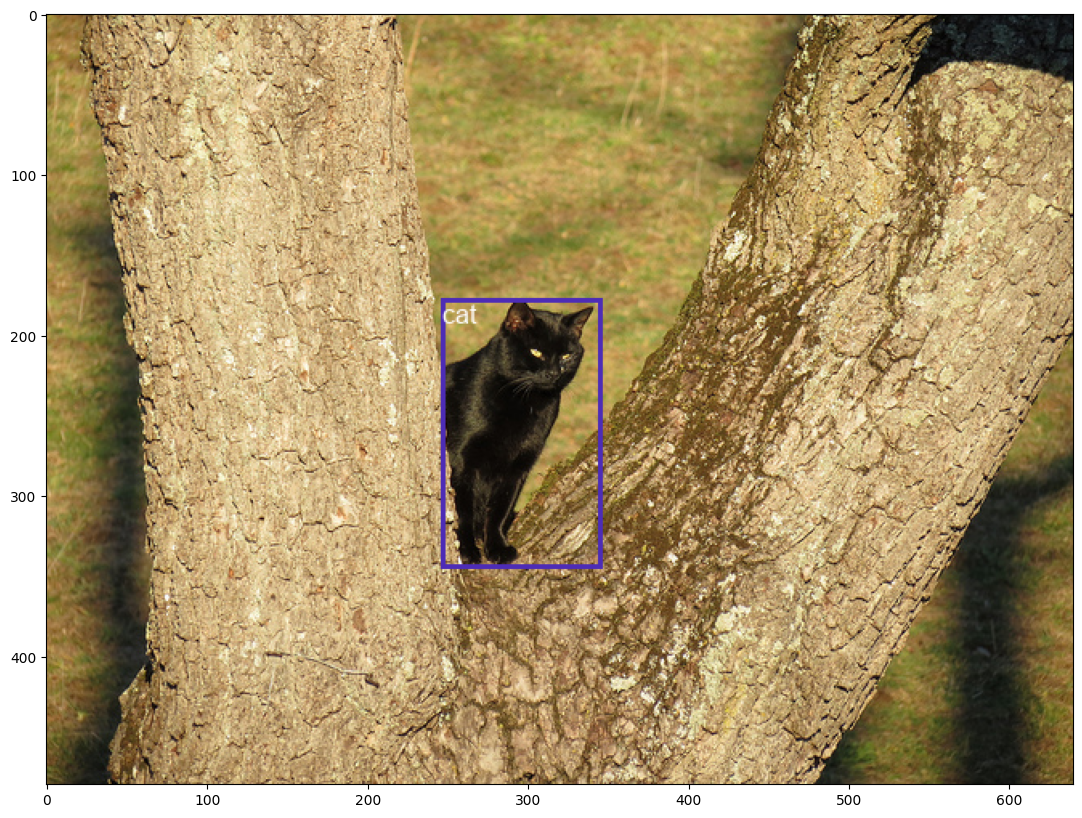

In [79]:
plt.rcParams['figure.figsize'] = (20, 10)
show_image_bounding_box(image,labels)

# Transform Data

In [88]:
def pad_to_square(image, boxes, pad_value=0, normalized_labels=True): 
    image_width, image_height = image.size
    width_factor, height_factor = (image_width, image_height) if normalized_labels else (1, 1)
    dimension_difference = np.abs(height - width)
    pad1 = dimension_difference // 2
    pad2 = dimension_difference - pad1

    if image_height <= image_width: 
        left, top, right, bottom = 0, pad1, 0, pad2
    else: 
        left, top, right, bottom = pad1, 0, pad2, 0
    padding = (left,top, right, bottom)

    image_padded = transforms.functional.pad(image, padding=padding, fill=pad_value)

    width_padded, height_padded = image_padded.size

    left_x_coordinate = width_factor * (boxes[:, 1] - boxes[:, 3] / 2)
    right_x_coordinate = width_factor * (boxes[:, 1] + boxes[:, 3] / 2)
    bottom_y_coordinate = height_factor * (boxes[:,2] - boxes[:, 4] / 2)
    top_y_coordinate = height_factor * (boxes[:,2] + boxes[:, 4] / 2)

    left_x_coordinate += left
    right_x_coordinate += right
    bottom_y_coordinate += bottom
    top_y_coordinate += top

    boxes[:, 1] = ((right_x_coordinate + left_x_coordinate) / 2) / width_padded
    boxes[:, 2] = ((bottom_y_coordinate + top_y_coordinate) / 2) / height_padded
    boxes[:, 3] *= width_factor / width_padded
    boxes[:, 4] *= height_factor / height_padded


    return image_padded, boxes

    

'''
explanation for: 
    left_x_coordinate += left
    right_x_coordinate += right
    bottom_y_coordinate += bottom
    top_y_coordinate += top

    
🏠 Think of Your Image Like a Room

Imagine your image is a room and your bounding box is a rug placed somewhere inside it.

•  The top-left corner of the room is coordinate (0, 0).
•  The rug’s position is measured from that corner — so if the rug starts 2 meters from the left wall, its x-coordinate is 2.

    🪟 Now Add Padding

Padding is like building extra space around the room — maybe you knock down a wall and add a hallway to the left.

•  If you add 1 meter of space to the left, the rug hasn’t moved in the real world, but relative to the new bigger room, it’s now 3 meters from the left wall instead of 2.
•  That’s why left padding is added to the x-coordinate — the origin (0,0) has shifted left, so all objects appear farther away from it.


'''